In [1]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")
import glob
import datetime

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "EQUIPE 4" --iversions

Author: EQUIPE 4

matplotlib: 3.4.1
seaborn   : 0.11.1
numpy     : 1.18.5
pandas    : 1.2.3



In [4]:
#carregando dados

path = r'..\data\raw' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

## Entendendo nosso conjunto de dados

In [5]:
#informação dos dodos
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  object 
 4   High       37082 non-null  float64
 5   Low        37082 non-null  float64
 6   Open       37082 non-null  float64
 7   Close      37082 non-null  float64
 8   Volume     37082 non-null  float64
 9   Marketcap  37082 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.8+ MB


In [6]:
df.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [7]:
# Visualiza amostra dos dados
frame.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [8]:
# Visualiza amostra dos dados
frame.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
37077,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10
37081,2893,XRP,XRP,2021-07-06 23:59:59,0.679923,0.652676,0.653055,0.665402,1.938959e+09,3.072284e+10


In [9]:
# Colunas
frame.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [10]:
# Resumo
print("Linhas: ", frame.shape[0])
print("Colunas: ", frame.shape[1])
print("\nVariáveis: \n", frame.columns.tolist())
print("\nValores Ausentes: \n" , frame.isnull().sum())
print("\nValores Únicos: \n", frame.nunique())

Linhas:  37082
Colunas:  10

Variáveis: 
 ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

Valores Ausentes: 
 SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Valores Únicos: 
 SNo           2991
Name            23
Symbol          23
Date          2991
High         36283
Low          36333
Open         36290
Close        36284
Volume       36393
Marketcap    36121
dtype: int64


In [11]:
frame.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,37082.000000,37082.000000,37082.000000,37082.000000,37082.000000,3.708200e+04,3.708200e+04
mean,1056.699018,1016.058015,952.987707,985.323755,987.120511,3.022542e+09,1.542943e+10
std,755.992373,5249.503670,4907.932082,5088.101367,5093.703878,1.190963e+10,7.059128e+10
min,1.000000,0.000089,0.000079,0.000086,0.000086,0.000000e+00,0.000000e+00
25%,420.000000,0.075664,0.069536,0.072456,0.072648,4.937190e+06,2.395955e+08
50%,910.000000,1.008733,0.999850,1.001157,1.001138,8.512805e+07,1.405335e+09
75%,1585.000000,31.916399,28.996246,30.459673,30.512205,9.388489e+08,5.159305e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [12]:
frame.Name.value_counts()

Litecoin           2991
Bitcoin            2991
XRP                2893
Dogecoin           2760
Monero             2602
Stellar            2527
Tether             2318
NEM                2288
Ethereum           2160
IOTA               1484
EOS                1466
Binance Coin       1442
TRON               1392
Chainlink          1385
Cardano            1374
USD Coin           1002
Crypto.com Coin     935
Wrapped Bitcoin     888
Cosmos              845
Solana              452
Polkadot            320
Uniswap             292
Aave                275
Name: Name, dtype: int64

In [19]:
media_volume = frame['Volume'].mean() # Média da coluna
media_marketcap = frame['Marketcap'].mean() # Média da coluna
print("Média Volume", media_volume)
print("Média Marketcap", media_marketcap)

Média Volume 3022541604.2694244
Média Marketcap 15429426181.106


In [26]:
#criar media para alguns valores especificos

df_xrp = frame.loc[frame['Name'] == 'XRP']
df_bitcoin = frame.loc[frame['Name'] == 'Bitcoin']
df_dogecoin = frame.loc[frame['Name'] == 'Dogecoin']


#XRP
media_volume_xrp = df_xrp['Volume'].mean() # Média da coluna
media_marketcap_xrp = df_xrp['Marketcap'].mean() # Média da coluna

#BITCOIN
media_volume_bitcoin = df_bitcoin['Volume'].mean() # Média da coluna
media_marketcap_bitcoin = df_bitcoin['Marketcap'].mean() # Média da coluna

#DOGECOIN
media_volume_dogecoin = df_dogecoin['Volume'].mean() # Média da coluna
media_marketcap_dogecoin = df_dogecoin['Marketcap'].mean() # Média da coluna


print("Média Volume XRP", media_volume_xrp)
print("Média Marketcap XRP", media_marketcap_xrp)

print("Média Volume BITCOIN", media_volume_bitcoin)
print("Média Marketcap BITCOIN", media_marketcap_bitcoin)

print("Média Volume DOGECOIN", media_volume_dogecoin)
print("Média Marketcap DOGECOIN", media_marketcap_dogecoin)





Média Volume XRP 1260299342.9771745
Média Marketcap XRP 9678506599.807404
Média Volume BITCOIN 10906334004.866829
Média Marketcap BITCOIN 120876059112.8843
Média Volume DOGECOIN 432632096.62974995
Média Marketcap DOGECOIN 1760532915.1020098


In [27]:
#criar media para alguns valores especificos

df_xrp = frame.loc[frame['Name'] == 'XRP']
df_bitcoin = frame.loc[frame['Name'] == 'Bitcoin']
df_dogecoin = frame.loc[frame['Name'] == 'Dogecoin']


#XRP
media_volume_xrp = df_xrp['High'].mean() # Média da coluna
media_marketcap_xrp = df_xrp['Low'].mean() # Média da coluna

#BITCOIN
media_volume_bitcoin = df_bitcoin['High'].mean() # Média da coluna
media_marketcap_bitcoin = df_bitcoin['Low'].mean() # Média da coluna

#DOGECOIN
media_volume_dogecoin = df_dogecoin['High'].mean() # Média da coluna
media_marketcap_dogecoin = df_dogecoin['Low'].mean() # Média da coluna


print("Média High XRP", media_volume_xrp)
print("Média Low XRP", media_marketcap_xrp)

print("Média High BITCOIN", media_volume_bitcoin)
print("Média Low BITCOIN", media_marketcap_bitcoin)

print("Média High DOGECOIN", media_volume_dogecoin)
print("Média Low DOGECOIN", media_marketcap_dogecoin)





Média High XRP 0.2465914151038283
Média Low XRP 0.2219996239053199
Média High BITCOIN 6893.326038383186
Média Low BITCOIN 6486.009538579529
Média High DOGECOIN 0.014964210574337567
Média Low DOGECOIN 0.012402098319209298


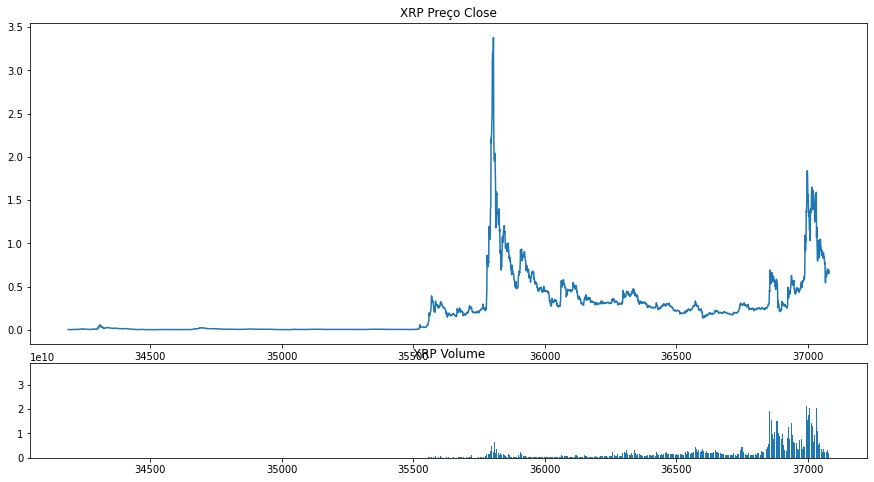

In [29]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df_xrp.index, df_xrp["Close"])
plt.title('XRP Preço Close')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df_xrp.index, df_xrp['Volume'])
plt.title('XRP Volume')

plt.gcf().set_size_inches(15,8)

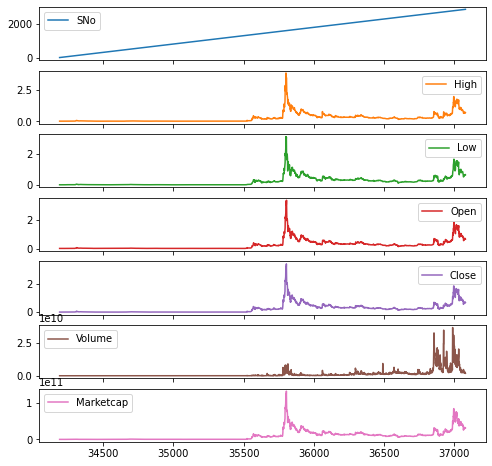

In [30]:
#XRP
df_xrp.plot(subplots = True, figsize = (8, 8));
plt.legend(loc = 'best')
plt.show()

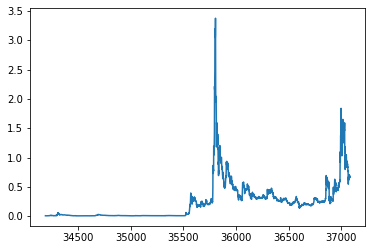

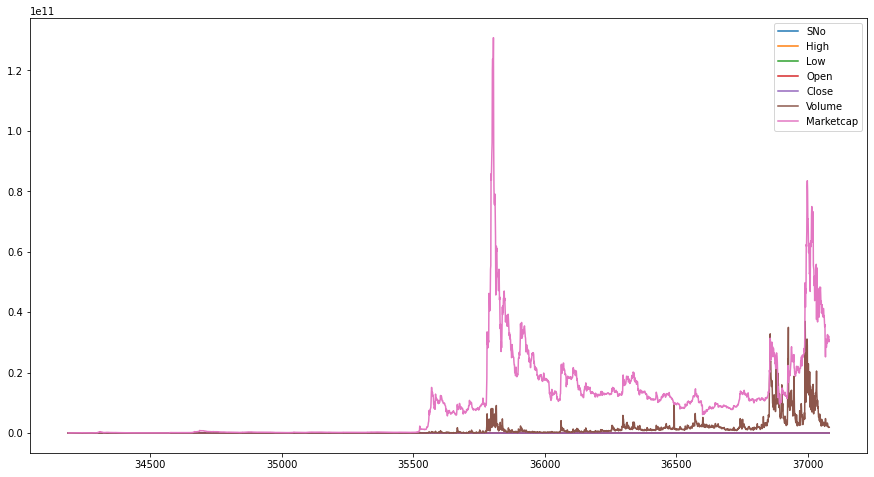

In [43]:
df_xrp.Close.plot(label='XRP Close')
df_xrp.plot(label='XRP')
plt.legend()
plt.gcf().set_size_inches(15,8)

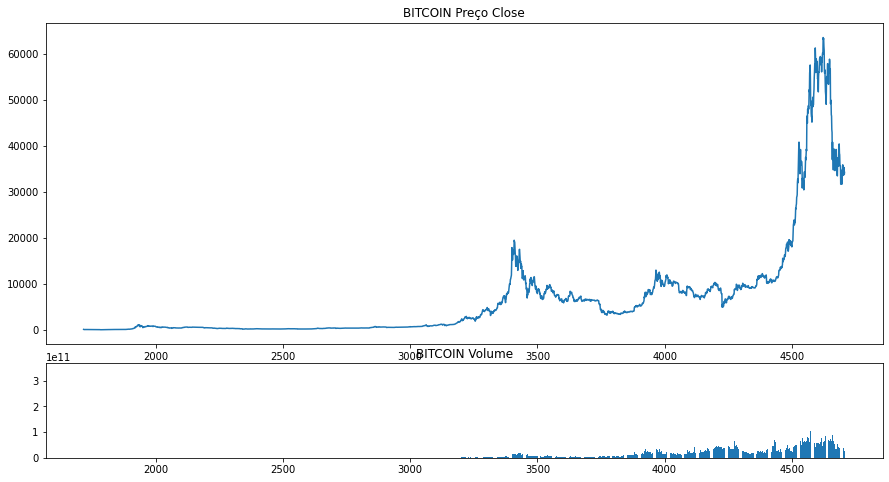

In [31]:
#Bitcoin
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df_bitcoin.index, df_bitcoin["Close"])
plt.title('BITCOIN Preço Close')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df_bitcoin.index, df_bitcoin['Volume'])
plt.title('BITCOIN Volume')

plt.gcf().set_size_inches(15,8)

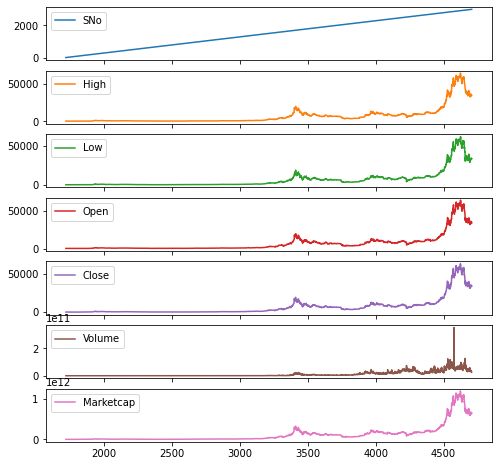

In [32]:
#Bitcoin
df_bitcoin.plot(subplots = True, figsize = (8, 8));
plt.legend(loc = 'best')
plt.show()

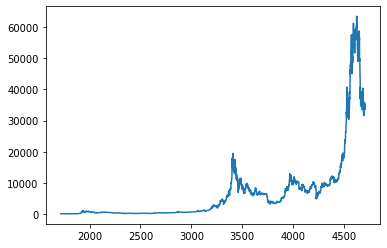

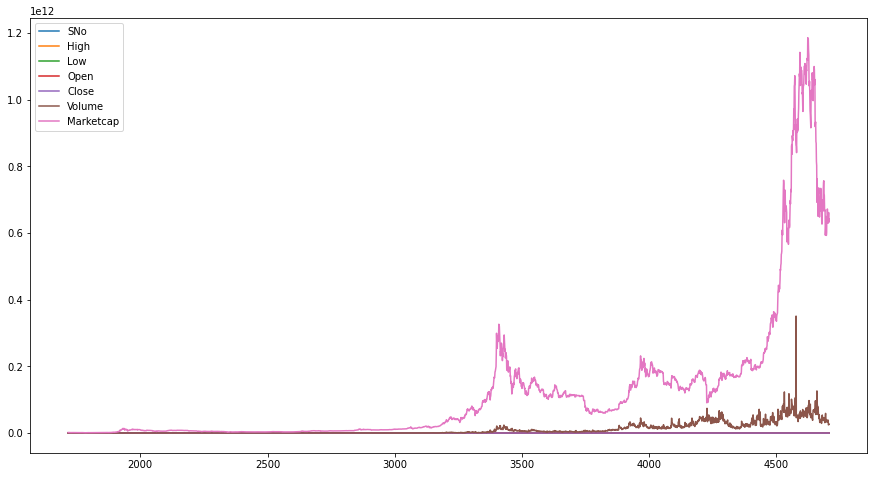

In [36]:
df_bitcoin.Close.plot(label='BITCOIN')
df_bitcoin.plot(label='BITCOIN')
plt.legend()
plt.gcf().set_size_inches(15,8)

<AxesSubplot:ylabel='Density'>

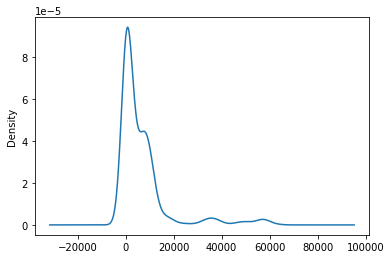

In [40]:
df_bitcoin.Close.plot(kind='kde')


<AxesSubplot:ylabel='Density'>

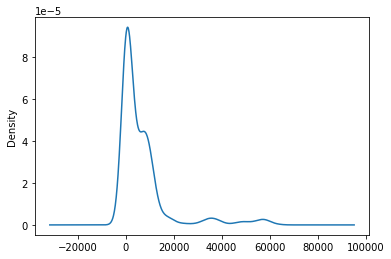

In [41]:
df_bitcoin.Open.plot(kind='kde')


<AxesSubplot:ylabel='Density'>

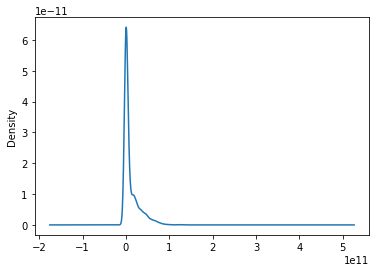

In [42]:
df_bitcoin.Volume.plot(kind='kde')

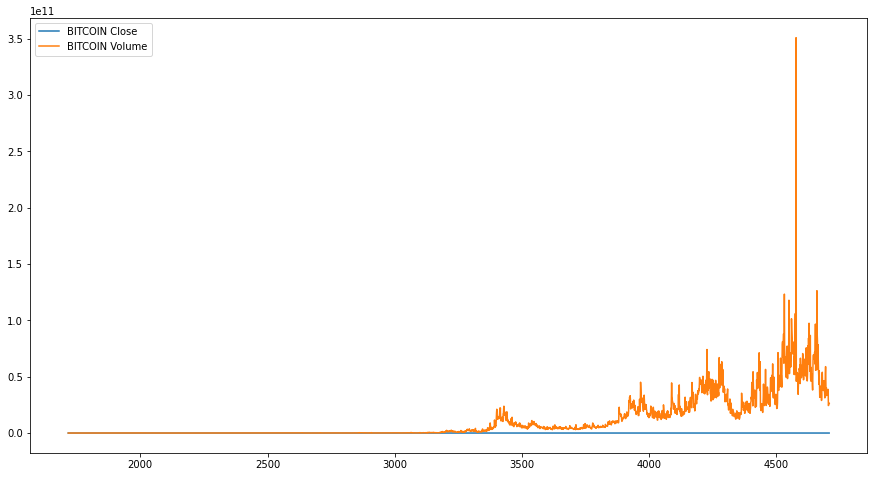

In [48]:
df_bitcoin.Close.plot(label='BITCOIN Close')
df_bitcoin.Volume.plot(label='BITCOIN Volume')
plt.legend()
plt.gcf().set_size_inches(15,8)